In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Artifacts/reddit comments.csv')

In [3]:
data.head()

,comment_id,self_text,label
0,k70vrzb,Lol what kind of busted translator device you ...,0.0
1,k70vk4r,Translation:\n\nAmen. Kill jews and continue g...,0.0
2,k70vhew,Friendly fact reminder: Israel has been steali...,0.0
3,k70ve4h,"Well, i would never support Hamas, but there a...",0.0
4,k70vaxh,There is absolutely evidence of Hamas taking C...,1.0


## Data preproccesing

In [4]:
data.shape

(10001, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

comment_id    0
self_text     0
label         2
dtype: int64

### Text Preprocess 

In [7]:
import re
import string

#### Convert uppercase into lowercase

In [8]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["self_text"].head(5)

0    lol what kind of busted translator device you ...
1    translation: amen. kill jews and continue gaza...
2    friendly fact reminder: israel has been steali...
3    well, i would never support hamas, but there a...
4    there is absolutely evidence of hamas taking c...
Name: self_text, dtype: object

#### Remove links

In [10]:
data["self_text"] = data['self_text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuation 

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["self_text"] = data["self_text"].apply(remove_punctuations)

In [13]:
data["self_text"].head(10)

0    lol what kind of busted translator device you ...
1    translation amen kill jews and continue gazan ...
2    friendly fact reminder israel has been stealin...
3    well i would never support hamas but there act...
4    there is absolutely evidence of hamas taking c...
5    do you have the avtual link to the new york ti...
6    i didnt deny anything you said i said israel d...
7    gtyes exactly hamas attacked not the 1 million...
8    firstly even in the best scenario you are conf...
9    oh i guess since hamas is putting the children...
Name: self_text, dtype: object

#### Remove numbers

In [14]:
data["self_text"] = data['self_text'].str.replace(r'\d+', '', regex=True)

#### Remove stop words

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk

In [17]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [19]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [21]:
data["self_text"].head()

0    lol kind busted translator device got speak ha...
1    translation amen kill jews continue gazan oppr...
2    friendly fact reminder israel stealing palesti...
3    well would never support hamas actions israel ...
4    absolutely evidence hamas taking captagon drug...
Name: self_text, dtype: object

## Stemming

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
data["self_text"] = data["self_text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [24]:
data["self_text"].head()

0       lol kind bust translat devic got speak hasbara
1         translat amen kill jew continu gazan oppress
2    friendli fact remind israel steal palestin lan...
3    well would never support hama action israel co...
4    absolut evid hama take captagon drug similar p...
Name: self_text, dtype: object

## Build Vocabulary

In [25]:
from collections import Counter
vocab = Counter()

In [26]:
vocab

Counter()

In [27]:
for sentence in data['self_text']:
    vocab.update(sentence.split())

In [28]:
len(vocab)

13638

In [29]:
data.shape

(10001, 3)

In [30]:
vocab

Counter({'israel': 3947,
         'hama': 2877,
         'peopl': 2519,
         'palestinian': 2127,
         'like': 1568,
         'isra': 1440,
         'jew': 1433,
         'gaza': 1406,
         'would': 1269,
         'war': 1163,
         'think': 1137,
         'one': 1133,
         'kill': 1099,
         'dont': 1054,
         'even': 1024,
         'civilian': 1014,
         'want': 996,
         'say': 994,
         'right': 968,
         'go': 964,
         'arab': 922,
         'get': 920,
         'know': 907,
         'countri': 848,
         'support': 841,
         'also': 823,
         'make': 801,
         'live': 765,
         'state': 759,
         'us': 759,
         'use': 730,
         'world': 724,
         'palestin': 712,
         'bomb': 696,
         'mani': 648,
         'see': 645,
         'year': 643,
         'time': 626,
         'attack': 623,
         'it’': 621,
         'land': 616,
         'take': 611,
         'peac': 609,
         'happen': 

In [31]:
tokens = [key for key in vocab if vocab[key] > 10]

In [32]:
len(tokens)

2337

In [33]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [34]:
data

,comment_id,self_text,label
0,k70vrzb,lol kind bust translat devic got speak hasbara,0.0
1,k70vk4r,translat amen kill jew continu gazan oppress,0.0
2,k70vhew,friendli fact remind israel steal palestin lan...,0.0
3,k70ve4h,well would never support hama action israel co...,0.0
4,k70vaxh,absolut evid hama take captagon drug similar p...,1.0
...,...,...,...
9996,k6xxvbz,gtthe peopl ive fight equal right issu sinc pe...,1.0
9997,k6xxv7i,think someon right kick home live mani year,1.0
9998,k6xxunr,nobodi think egypt syria either,1.0
9999,k6xxtox,build arena sole purpos violent protest keep c...,1.0


## Divide dataset

In [35]:
x= data['self_text']
y= data['label']

In [36]:
!pip install scikit-learn

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
x_train.shape

(8000,)

In [39]:
x_test.shape

(2001,)

In [40]:
x_train

165     would lose support matter don’t hold democrat ...
8598                                             kyri irv
2594    poll found peopl gaza support suicid bomb targ...
3427                             envi open season zionazi
1382        pogrom mainli happen russia easter europ fact
                              ...                        
1559                                                thank
4533                      ongo situat russian polic arriv
4096    isra bot human blatantli openli deni histori p...
4791                                   free palestin hama
8269                        israel bomb kill isra kibbutz
Name: self_text, Length: 8000, dtype: object

In [41]:
y_test

8029    1.0
1050    1.0
7569    1.0
2962    1.0
6980    1.0
       ... 
6585    1.0
2592    1.0
2178    1.0
2702    1.0
7423    1.0
Name: label, Length: 2001, dtype: float64

## Vectorization

In [42]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [43]:
vectorized_x_train = vectorizer(x_train, tokens)

In [44]:
vectorized_x_test = vectorizer(x_test, tokens)

In [45]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(8000, 2337), dtype=float32)

In [46]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2001, 2337), dtype=float32)

In [47]:
y_train

165     1.0
8598    1.0
2594    1.0
3427    1.0
1382    1.0
       ... 
1559    1.0
4533    1.0
4096    1.0
4791    1.0
8269    0.0
Name: label, Length: 8000, dtype: float64

In [48]:
y_test

8029    1.0
1050    1.0
7569    1.0
2962    1.0
6980    1.0
       ... 
6585    1.0
2592    1.0
2178    1.0
2702    1.0
7423    1.0
Name: label, Length: 2001, dtype: float64

### Handle imbalance dataset

In [49]:
!pip install imbalanced-learn

In [50]:
non_nan_indices = ~np.isnan(y_train)

# Filter both vectorized_x_train and y_train to remove rows where y_train has NaN values
vectorized_x_train = vectorized_x_train[non_nan_indices]
y_train = y_train[non_nan_indices]
np.isnan(y_train).sum()

np.int64(0)

In [51]:
# Remove rows where y_test has NaN values
non_nan_indices_test = ~np.isnan(y_test)
vectorized_x_test = vectorized_x_test[non_nan_indices_test]
y_test = y_test[non_nan_indices_test]

# Verify that all NaN values are removed
print(np.isnan(y_test).sum())  # This should output 0

0


In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(14122, 2337) (14122,)


In [53]:
y_train_smote.value_counts()

label
1.0    7061
0.0    7061
Name: count, dtype: int64

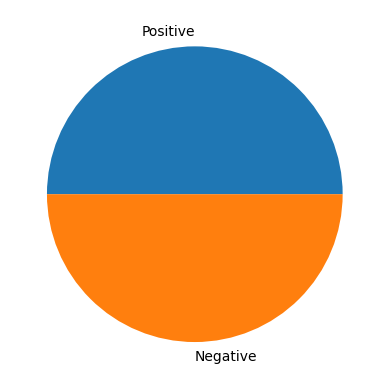

In [54]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [55]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(14122, 2337), dtype=float32)

In [56]:
y_train_smote

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14117    0.0
14118    0.0
14119    0.0
14120    0.0
14121    0.0
Name: label, Length: 14122, dtype: float64

In [57]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2001, 2337), dtype=float32)

In [58]:
y_test

8029    1.0
1050    1.0
7569    1.0
2962    1.0
6980    1.0
       ... 
6585    1.0
2592    1.0
2178    1.0
2702    1.0
7423    1.0
Name: label, Length: 2001, dtype: float64

## Model training and evaluation

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Naive Bayes

In [61]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.882
	Precision = 0.964
	Recall = 0.794
	F1-Score = 0.871
Testing Scores:
	Accuracy = 0.775
	Precision = 0.974
	Recall = 0.762
	F1-Score = 0.855


### Support vector

In [62]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.984
	Precision = 0.97
	Recall = 0.999
	F1-Score = 0.984
Testing Scores:
	Accuracy = 0.949
	Precision = 0.948
	Recall = 0.997
	F1-Score = 0.971


In [63]:
import pickle

with open('../static/model/model.pickle_mnb', 'wb') as file:
    pickle.dump(mnb, file)


In [64]:
import pickle

with open('../static/model/model.pickle_svm', 'wb') as file:
    pickle.dump(svm, file)